In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
d=np.array([[1,2],[2,3],[2,1.9],[1,2.7],[4,5],[5,6],[6,7],[7,5.5]])

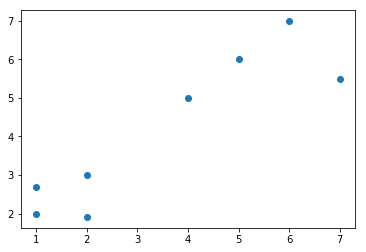

In [3]:
plt.scatter(d[:,0],d[:,1])
plt.show()

In [4]:
algo=KMeans(2)

In [5]:
algo.fit(d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
algo.cluster_centers_,algo.labels_

(array([[5.5  , 5.875],
        [1.5  , 2.4  ]]), array([1, 1, 1, 1, 0, 0, 0, 0]))

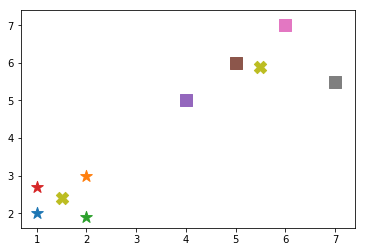

In [7]:
m=['s','*','>','+']
for i in range(len(d)):
    plt.scatter(*d[i],marker=m[algo.labels_[i]],s=150)
plt.scatter(algo.cluster_centers_[:,0],algo.cluster_centers_[:,1],marker='X',s=150)
plt.show()

In [57]:
class Kmeans:
    def __init__(sf,n=2,tol=0.0001,max_iter=300):
        sf.n=n
        sf.iter=max_iter
        sf.tol=tol
    def fit(sf,data):
        sf.cent=[]
        for i in range(sf.n):
            sf.cent.append(data[i])
        for i in range(sf.iter):
            d=dict.fromkeys(range(sf.n))
            for i in d:
                d[i]=[]
            for pt in data:
                dist=[np.linalg.norm(c-pt) for c in sf.cent]
                d[dist.index(min(dist))].append(pt)
            prev=sf.cent.copy()
            for key in d:
                sf.cent[key]=np.mean(d[key],axis=0)
            if np.linalg.norm(np.array(prev)-np.array(sf.cent))<sf.tol:
                break
        sf.labels=[]
        for pt in data:
            for key in d:
                if pt in np.array(d[key]):
                    sf.labels.append(key)

In [58]:
alg=Kmeans(n=2)
alg.fit(d)
alg.cent,alg.labels


([array([1.5, 2.4]), array([5.5  , 5.875])], [0, 0, 0, 0, 1, 1, 1, 1])